In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

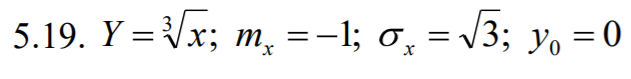

In [99]:
# b = 2, a =-4

a = -4.
b = 2.
y0 = 0
n = int(input())

100


In [100]:
X = []
Y = []
# Формируем однородную непрерывную случайную величину.
random_variable = sts.uniform()
# Генерируем случайные числа
xi = random_variable.rvs(size=n)
# X_i = e_i(b - a) + a
for i in range(n):
    x = xi[i] * (b - a) + a
    X.append(x)
    if x < 0:
        y = - (abs(x))**(1/3)
    else:
        y = x**(1/3)
    Y.append(y)

In [101]:
print(Y)

[-1.398668376055898, -1.2388082563150655, -0.8467820394898486, -1.5669023580949846, -1.3468905136064255, 0.953913301544085, 0.5027427183335904, -1.5741885773206532, 0.6007007474501092, 0.9524754654493027, 0.9991390107065897, -1.498253643332554, 0.36882136760538664, -1.4326477744718424, -1.3162281980016217, 0.8029009308219658, -0.8510448808252207, -0.9903460747392154, -1.1350568707081639, 0.9377834828577392, -1.4060443026622174, -1.5183698341015068, -1.1326766600182443, -1.1669746377535706, -1.513153525316005, 1.2296391968731621, -1.5840054647985053, -0.8758805455109261, 1.0415517844637605, -1.1937589881940487, -1.1166186266273819, -0.5656149381284302, -1.5168481354617538, 1.0924790666197493, -1.2904086008464322, 0.8930456244418199, -1.4934391211156803, 0.7099230391687193, -1.0172710775104594, -1.4995079685302954, -1.3759183183926058, -0.6271071066102114, 0.9127791418648202, -1.2690341586978524, -1.4595783809155973, -1.553167369100556, -1.0683329315271337, -0.8389035932386959, 0.7616503

2) Для полученной случайной величины построить вариационный ряд, эмпирическую функцию распределения СВ Y. Результаты представить в виде таблицы и графика.

In [102]:
def empiric_func(sample):
    sample_without_repeat = sorted(list(set(sample)))
    sample_without_repeat.insert(0, -float('Inf'))
    size = len(sample)
    F_y = []
    propability = 0
    for elem in sample_without_repeat:
        propability += sample.count(elem)/size
        F_y.append(propability)
    return list(sample_without_repeat), F_y

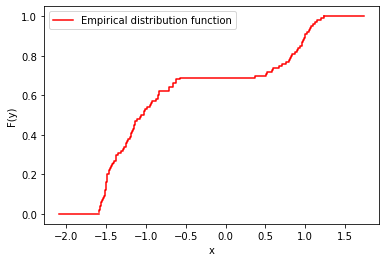

In [103]:
sorted_Y = sorted(Y)
emp_x, emp_y = empiric_func(sorted_Y)
plt.step(emp_x, emp_y, label='Empirical distribution function', color='r')
plt.plot([emp_x[1]-0.5, emp_x[1]], [0,0] ,color='r')
plt.plot([emp_x[-1], emp_x[-1]+0.5], [1,1] , color='r')
plt.xlabel('x')
plt.ylabel('F(y)')
plt.legend()

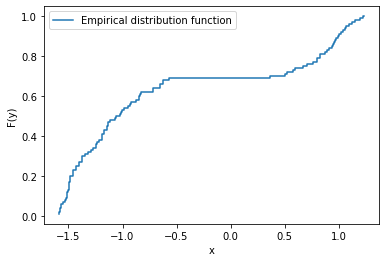

In [104]:
# проверка с использованием встроенной функции
emp_dist_func = ECDF(Y)
plt.step(emp_dist_func.x, emp_dist_func.y, label='Empirical distribution function')
plt.xlabel('x')
plt.ylabel('F(y)')
plt.legend()

In [105]:
print("Вариационный ряд:")
data = {"Значение": sorted_Y}
table = pd.DataFrame(data=data)
table.T

Вариационный ряд:


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Значение,-1.584005,-1.580723,-1.574189,-1.566902,-1.566186,-1.553167,-1.532974,-1.520527,-1.51837,-1.516848,...,1.02472,1.041552,1.059192,1.06946,1.092479,1.120939,1.14853,1.19733,1.229639,1.233013


3) Найти теоретически функцию распределения СВ $Y$. Результаты представить в аналитическом виде и в виде графика.

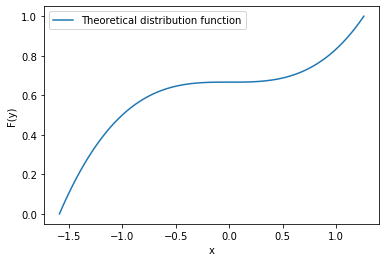

In [106]:
x_teor = np.linspace(-(4)**(1/3), 2**(1/3), 100)
y_teor = (x_teor**3 + 4) / 6
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.xlabel('x')
plt.ylabel('F(y)')
plt.legend()

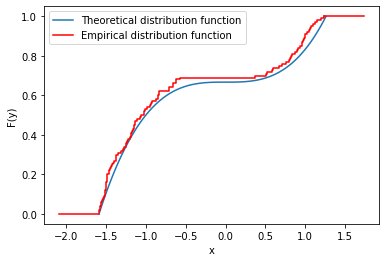

In [107]:
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.step(emp_x, emp_y, label='Empirical distribution function', color='r')
plt.plot([emp_x[1]-0.5, emp_x[1]], [0,0] ,color='r')
plt.plot([emp_x[-1], emp_x[-1]+0.5], [1,1] ,color='r')
plt.ylabel('F(y)')
plt.xlabel('x')
plt.legend()

Lab2

In [127]:
#определяем колво интервалов
if n <= 100:
    M = int(np.sqrt(n))
else:
    M = int(4 * np.log10(n))

Cтроим гистограмму равноинтервальным методом c помощью функции matplotlib.pyplot.hist()

In [128]:
def amount_in_gap(start_point, end_point, sample, delta_i):
    n = 0
    if start_point == sample[0]:
        n += sample.count(start_point)
    for elem in sample:
        if elem > start_point and elem < end_point:
            n += 1
        else:
            if elem == end_point:
                n += 1
    return n/(len(sample)*delta_i)

def equal_interval(sample):
    sample.sort()
    A = np.zeros(M)
    B = np.zeros(M)
    v_i = np.zeros(M)
    delta_i = (sample[-1]-sample[0])/M
    for i in range(M):
        A[i] = sample[0] + i * delta_i
        B[i] = sample[0] + (i + 1) * delta_i
        v_i[i] = amount_in_gap(A[i], B[i], sample, delta_i)
    return A, B, v_i

Гистограмма равноинтервальным методом:


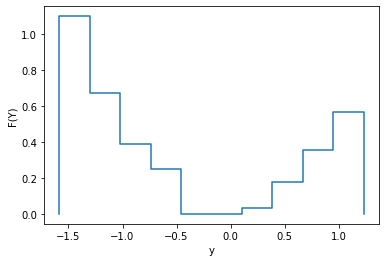

In [129]:
A, B, v_i = equal_interval(Y)
x, y = [], []
x.append(A[0])
y.append(0)
for key, item in enumerate(A):
    x.append(A[key])
    x.append(B[key])
    y.append(v_i[key])
    y.append(v_i[key])
x.append(B[-1])
y.append(0)
plt.plot(x, y, label='F*(x)')
print("Гистограмма равноинтервальным методом:")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

Строим полигон распределения:

Гистограмма равноинтервальным методом:


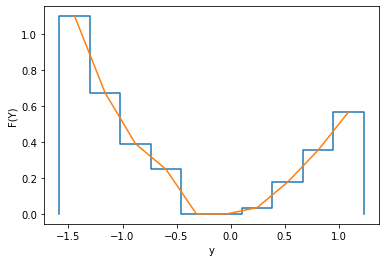

In [130]:
plt.plot(x, y, label='F*(x)')
m = A[1] - A[0]
plt.plot(A + m / 2, v_i) 
print("Гистограмма равноинтервальным методом:")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

Эмпирическая функция распределения по сгруппированным данным

In [131]:
norm_prob = v_i * (A[1] - A[0])
empiric_distrib_func = []
sum = 0.
for i in norm_prob:
    empiric_distrib_func.append(sum)
    sum += i
empiric_distrib_func.append(1)
print("Эмпирическая функция распределения:")
print(empiric_distrib_func)

Эмпирическая функция распределения:
[0.0, 0.30999999999999994, 0.4999999999999999, 0.6099999999999999, 0.6799999999999998, 0.6799999999999998, 0.6799999999999998, 0.6899999999999998, 0.7399999999999999, 0.8399999999999999, 1]


График эмпирической функции распределения:


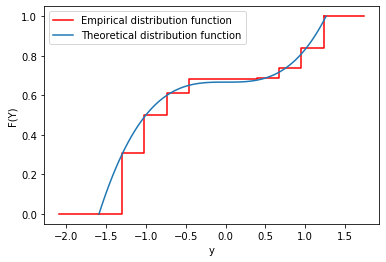

In [132]:
intervals = [A[0]]
for i in B:
    intervals.append(i)
    intervals.append(i)
intervals.append(float("Inf"))
F_grafic = []
for elem in empiric_distrib_func:
    F_grafic.append(elem)
    F_grafic.append(elem)
plt.plot(intervals, F_grafic, label='Empirical distribution function', color = 'r')
plt.plot([intervals[0]-0.5, intervals[0]], [0,0] ,color='r')
plt.plot([B[-1], B[-1]+0.5], [1,1] ,color='r')
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.legend()
print("График эмпирической функции распределения:")
plt.show()

In [133]:
interval = list(A)
interval.append(B[-1])
table = pd.DataFrame(data={"Y": interval, "F(Y)": empiric_distrib_func})
table.T

,0,1,2,3,4,5,6,7,8,9,10
Y,-1.584005,-1.302304,-1.020602,-0.7389,-0.457198,-0.175496,0.106206,0.387907,0.669609,0.951311,1.233013
F(Y),0.000000,0.310000,0.500000,0.6100,0.680000,0.680000,0.680000,0.690000,0.740000,0.840000,1.000000


Найдем теоретическую плотность распределения:

In [134]:
f_y = []
for xi in x_teor:
    f_y.append(1/2*xi**2) # теоретическая плотность распределения

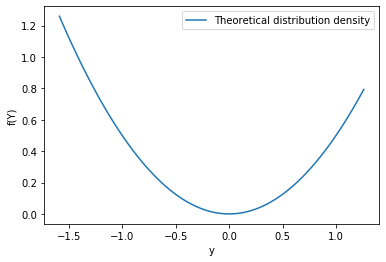

In [135]:
plt.plot(x_teor, f_y, label='Theoretical distribution density')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.legend()
plt.show()

Сравним найденные теоретическую и эмпирическую плотности распределения:

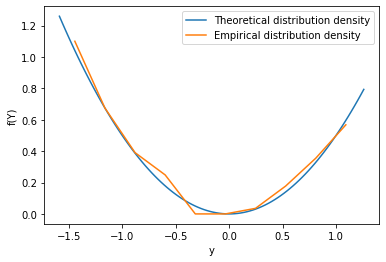

In [136]:
plt.plot(x_teor, f_y, label='Theoretical distribution density')
# Эмпирическая плотность распределения
m = A[1] - A[0]
plt.plot(A + m / 2,  v_i, label='Empirical distribution density')
plt.legend()
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Построить гистограмму равновероятностным методом

In [146]:
m = n // M

In [147]:
def equal_probability(sample):
    sample.sort()
    A = np.zeros(M)
    B = np.zeros(M)
    
    A[0] = sample[0]
    B[-1] = sample[-1]
    for i in range(1, M):
        A[i] = (sample[m * i] + sample[m * i + 1]) / 2
        B[i - 1] = A[i]
    delta = []
    for i in range(len(A)):
        delta.append(B[i] - A[i])
    f_x = []
    x = []
    s = A[0]
 
    for i in delta:
        f_x.append(1. /(M * i))
        x.append(s)
        s += i
    return (x, f_x)

In [148]:
x, y = equal_probability(Y)

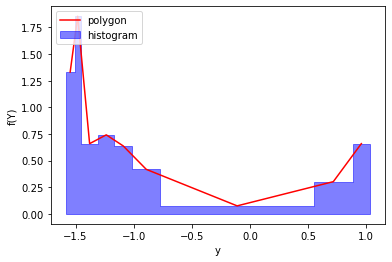

,0,1,2,3,4,5,6,7,8,9
x0,-1.584005,-1.508881,-1.454972,-1.303318,-1.168558,-1.011803,-0.772768,0.551289,0.881504,1.033136
normed m,1.331124,1.854974,0.659398,0.742058,0.637939,0.418349,0.075525,0.302833,0.659492,0.500308


In [149]:
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
nx = []
for i in range(len(x) - 1):
    nx.append((x[i] + x[i+1]) / 2)
plt.plot(nx, y[:-1], color='r', label='polygon')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

table2 = pd.DataFrame(data={"x0" : x, "normed m": y})
table2.T

Эмпирическая функция распределения по сгруппированным данным

In [150]:
empiric_distrib_func = []
sum = 0.
v = 1 / M
for i in range(len(y)):
    empiric_distrib_func.append(sum)
    sum += v
empiric_distrib_func.append(sum)
print(empiric_distrib_func)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]


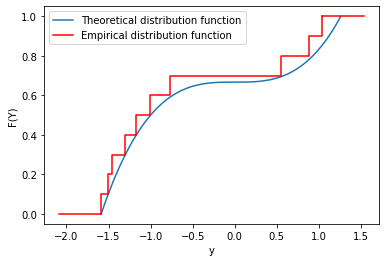

In [151]:
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
x_interval = []
x_interval.append(-float("Inf"))
for xi in x:
    x_interval.append(xi)
    x_interval.append(xi)
x_interval.append(float("Inf"))
F_y = []
for F_i in empiric_distrib_func:
    F_y.append(F_i)
    F_y.append(F_i)
plt.plot(x_interval, F_y, label='Empirical distribution function', color = 'r')
plt.plot([x[0]-0.5, x[0]], [0,0] ,color='r')
plt.plot([x[-1], x[-1]+0.5], [1,1] ,color='r')
plt.legend()
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

Сравним найденные теоретическую и эмпирическую плотности распределения:

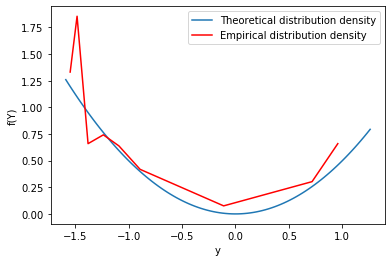

In [152]:
plt.plot(x_teor, f_y, label='Theoretical distribution density')
plt.plot(nx, y[:-1], color='r', label='Empirical distribution density')
plt.legend()
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()